In [1]:
## given and entire unsolved sudoku, what is the value of just one cell? let's say, the first cell. 

In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

import random
import matplotlib.pyplot as plt


def their_data(filename, size):
	DATA_SIZE = size
	quizzes = np.zeros((DATA_SIZE, 81), np.int32)
	solutions = np.zeros((DATA_SIZE, 81), np.int32)
	for i, line in enumerate(open(filename, 'r').read().splitlines()[1:]):
	    quiz, solution = line.split(",")
	    for j, q_s in enumerate(zip(quiz, solution)):
	        q, s = q_s
	        quizzes[i, j] = q
	        solutions[i, j] = s

	quizzes = quizzes.reshape((-1, 9, 9))
	solutions = solutions.reshape((-1, 9, 9))
	return quizzes, solutions



def my_data(filename, size):
	DATA_SIZE = size
	quizzes = np.zeros((DATA_SIZE, 81), np.int32)
	solutions = np.zeros((DATA_SIZE, 81), np.int32)
	for i, line in enumerate(open(filename, 'r').read().splitlines()[1:]):
	    quiz, solution = line.split(",")
	    quiz = quiz[1:-1]
	    solution = solution[2:-1]
	    for j, q_s in enumerate(zip(quiz, solution)):
	        q, s = q_s
	        quizzes[i, j] = q
	        solutions[i, j] = s
	quizzes = quizzes.reshape((-1, 9, 9))
	solutions = solutions.reshape((-1, 9, 9))
	return quizzes, solutions

#qmillion, smillion = my_data("mixedSudokusBetter.csv", 1000000)
#q30k, s30k = my_data("30k_mixedSudokus75_80.csv", 30000)
#q80, s80 = my_data("s_make80.csv", 5000)
#qbig, sbig = their_data("1mTheirSudokus.csv", 1000000)
#print("Done with trivial files")
#q1m, s1m = my_data("mixedSudokus1m.csv", 1000000)
#print("Done with file q1")
#q2m, s2m = my_data("mixedSudokus2m.csv", 1000000)
#print("Done with file q2")
#q3m, s3m = my_data("mixedSudokus3m.csv", 1000000)
#print("Done with file q3")
#q4m, s4m = my_data("mixedSudokus4m.csv", 1000000)
#print("Done with file reading")
q, s = my_data("FilledPuzzles50k.csv", 50000)

#mega_quiz = np.concatenate((q80, q30k), axis=0)
#mega_sol = np.concatenate((s80, s30k), axis=0)

mega_quiz = q
mega_sol = s

print("Done with concatenate")

Done with concatenate


In [3]:
## flatten the solutions: 

def flatten_sols(np_arr):
    one_puzzle = []
    for i in range(0,len(np_arr)):
        one_puzzle.append(np_arr[i].flatten())
    one_puzzle = np.asarray(one_puzzle)
    return one_puzzle

mega_sol = flatten_sols(mega_sol)

print(mega_sol[0])

[8 1 4 7 6 3 2 5 9 9 6 5 8 2 1 4 7 3 2 7 3 4 5 9 8 1 6 6 9 1 3 8 2 7 4 5 5
 3 7 6 1 4 9 2 8 4 8 2 9 7 5 6 3 1 1 4 8 5 9 7 3 6 2 3 2 6 1 4 8 5 9 7 7 5
 9 2 3 6 1 8 4]


In [4]:
## remove function, to pluck one digit at a time from the puzzle 
# takes in a sudoku quiz, so don't pass in a whole array
def remove_one(quiz):
	random_row = random.randint(0,8)
	random_col = random.randint(0,8)

	if quiz[random_row][random_col] == 0:
		random_row = random.randint(0,8)
		random_col = random.randint(0,8)

	if quiz[random_row][random_col] == 0:
		random_row = random.randint(0,8)
		random_col = random.randint(0,8)

	if quiz[random_row][random_col] == 0:
		random_row = random.randint(0,8)
		random_col = random.randint(0,8)

	quiz[random_row][random_col] = 0
	return quiz

In [5]:
#mega_quiz[0]

In [6]:
#mega_sol[0][0][0]

In [7]:
## extract the values of the very first cell of each solution
def extract_values(numpy_arr, cell):
    values_of_cell = []
    for i in range(len(numpy_arr)):
        values_of_cell.append(numpy_arr[i][cell])
    return np.asarray(values_of_cell)


## loop that creates n amount of solution arrays: 
solutions = [] #list of solution arrays

for j in range(0,81):                  ## 9 digit max... need to flatten solutions 
    s = extract_values(mega_sol,j)
    solutions.append(s)

#print(solutions[0][2])
#solutions[0].shape
## solutions is now a list of np arrays, each one representing the nth cell of all given sudoku solutions

#print(mega_quiz[0])
#print(solutions[0][0])
#print(solutions[1][0])


In [8]:
## Shuffle, normalize and add extra dimension to n_qmega because of convolution layers 
SEED = 42
np.random.seed(SEED)
np.random.shuffle(mega_quiz)

## shuffle all sudoku solutions
for i in range(len(solutions)):
    np.random.seed(SEED)
    np.random.shuffle(solutions[i])

print("Done with mega shuffle")

#print(mega_quiz[0])
#print(solutions[0][0])
#print(solutions[1][0])



Done with mega shuffle


In [9]:
solutions = np.asarray(solutions)

In [10]:
solutions[0]

array([5, 3, 7, ..., 7, 8, 3], dtype=int32)

In [11]:
solutions.shape

(81, 50000)

In [12]:
## normalize all solutions arrays in solutions list:
#solutions = solutions/9.
    
n_qmega = mega_quiz / 9.

print("Done with normalize")


## add extra dimension: 
n_qmega = np.expand_dims(n_qmega, -1)

print("added dimension")
print(n_qmega.shape)


Done with normalize
added dimension
(50000, 9, 9, 1)


In [13]:
solutions[5]

array([3, 4, 5, ..., 8, 3, 5], dtype=int32)

In [14]:
n_qmega[0][0]

array([[0.55555556],
       [0.44444444],
       [1.        ],
       [0.88888889],
       [0.22222222],
       [0.33333333],
       [0.11111111],
       [0.66666667],
       [0.77777778]])

In [15]:
i = Input(shape=n_qmega[0].shape)
x = Conv2D(8, (3,3), strides=1, activation='relu',padding='same', bias_initializer='random_uniform')(i)
x = BatchNormalization()(x)
x = Conv2D(16, (3,3), strides=1, activation='relu',padding='same', bias_initializer='random_uniform')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), strides=1, activation='relu',padding='same', bias_initializer='random_uniform')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation="relu", bias_initializer='random_uniform')(x)

out_layers = [
    Dense(10, activation='softmax')(x)
    for i in range(81)
]

model = Model(i, out_layers)
 
opt = keras.optimizers.Adam(lr=0.01)
opt2 = keras.optimizers.SGD(lr=0.01, nesterov=True)

## compile and fit model: 

model.compile(optimizer = keras.optimizers.Adam(lr=0.001),
	loss="categorical_crossentropy",
	metrics=[])

print(model.summary())

labels = [solutions[i] for i in range(81)]        

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9, 9, 1)]    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 9, 9, 8)      80          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 9, 9, 8)      32          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 9, 9, 16)     1168        batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
labels = np.asarray(labels)
print(labels.shape)

for i in range(20):
    print(labels[i])

(81, 50000)
[5 3 7 ... 7 8 3]
[4 9 9 ... 9 9 4]
[9 5 3 ... 3 5 1]
[8 6 2 ... 6 6 7]
[2 8 6 ... 2 7 6]
[3 4 5 ... 8 3 5]
[1 1 4 ... 1 2 2]
[6 7 1 ... 5 1 8]
[7 2 8 ... 4 4 9]
[8 7 1 ... 4 2 7]
[3 6 2 ... 8 6 2]
[7 2 8 ... 1 3 9]
[6 3 3 ... 9 1 8]
[1 5 7 ... 7 8 3]
[4 1 4 ... 5 4 4]
[9 8 5 ... 3 5 6]
[5 9 9 ... 6 9 1]
[2 4 6 ... 2 7 5]
[6 1 5 ... 2 4 6]
[1 8 6 ... 5 1 8]


In [17]:
from tensorflow.keras.utils import to_categorical

#print(labels[0].shape)

y_binary = []
for i in range(81):
    foo = to_categorical(labels[i],num_classes=10)
    y_binary.append(foo)
    
y_binary = np.asarray(y_binary)
print(labels[0])
print(y_binary.shape)

[5 3 7 ... 7 8 3]
(81, 50000, 10)


In [18]:
for i in range(20):
    print(y_binary[i][0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
## Fit the model using sudokus will fewer and fewer digits
r = model.fit(n_qmega, [y_binary[i] for i in range(81)], epochs=2, batch_size=64, validation_split=0.01, verbose=1)

history = r.history['loss']
history_val = r.history['val_loss']

for q in n_qmega:
        q = remove_one(q)


meta = 10 

for i in range(meta):
    print("META EPOCH: ", i, "/", meta)
    r = model.fit(n_qmega, [y_binary[i] for i in range(81)], epochs=3, batch_size=64, validation_split=0.01, verbose=1)
    history = np.concatenate((history, r.history['loss']))
    history_val = np.concatenate((history_val, r.history['val_loss'])) 
    for q in n_qmega:
        q = remove_one(q)

meta2 = 5
for i in range(meta2):
    print("META EPOCH SECOND ROUND: ", i, "/", meta2)
    r = model.fit(n_qmega, [y_binary[i] for i in range(81)], epochs=10, batch_size=64, validation_split=0.01, verbose=1)
    history = np.concatenate((history, r.history['loss']))
    history_val = np.concatenate((history_val, r.history['val_loss']))
    for q in n_qmega:
        q = remove_one(q)



Train on 49500 samples, validate on 500 samples
Epoch 1/2
49500/49500 [==============================] - 40s 811us/sample - loss: 118.2012 - dense_1_loss: 2.0313 - dense_2_loss: 2.0784 - dense_3_loss: 2.0032 - dense_4_loss: 1.9248 - dense_5_loss: 2.0174 - dense_6_loss: 1.7554 - dense_7_loss: 1.7917 - dense_8_loss: 1.9875 - dense_9_loss: 2.1174 - dense_10_loss: 1.6201 - dense_11_loss: 1.4195 - dense_12_loss: 1.1960 - dense_13_loss: 1.4821 - dense_14_loss: 1.3508 - dense_15_loss: 1.3689 - dense_16_loss: 1.2056 - dense_17_loss: 1.5640 - dense_18_loss: 1.8994 - dense_19_loss: 1.2232 - dense_20_loss: 1.2079 - dense_21_loss: 1.3998 - dense_22_loss: 1.5667 - dense_23_loss: 1.4128 - dense_24_loss: 1.2878 - dense_25_loss: 1.1923 - dense_26_loss: 1.5453 - dense_27_loss: 2.0300 - dense_28_loss: 1.5380 - dense_29_loss: 1.1723 - dense_30_loss: 1.6710 - dense_31_loss: 1.1317 - dense_32_loss: 1.1154 - dense_33_loss: 1.1516 - dense_34_loss: 1.1995 - dense_35_loss: 1.6352 - dense_36_loss: 2.0010 - dens

49500/49500 [==============================] - 37s 747us/sample - loss: 103.3043 - dense_1_loss: 2.1577 - dense_2_loss: 2.1649 - dense_3_loss: 2.1273 - dense_4_loss: 1.9491 - dense_5_loss: 2.1879 - dense_6_loss: 1.6991 - dense_7_loss: 1.7994 - dense_8_loss: 2.0619 - dense_9_loss: 2.1878 - dense_10_loss: 1.3426 - dense_11_loss: 1.2003 - dense_12_loss: 0.9884 - dense_13_loss: 1.2971 - dense_14_loss: 1.1545 - dense_15_loss: 1.1825 - dense_16_loss: 0.9827 - dense_17_loss: 1.3673 - dense_18_loss: 1.9803 - dense_19_loss: 0.9572 - dense_20_loss: 0.9940 - dense_21_loss: 1.1545 - dense_22_loss: 1.3305 - dense_23_loss: 1.1983 - dense_24_loss: 0.9841 - dense_25_loss: 0.9703 - dense_26_loss: 1.4542 - dense_27_loss: 2.1414 - dense_28_loss: 1.2731 - dense_29_loss: 0.9296 - dense_30_loss: 1.6777 - dense_31_loss: 0.8876 - dense_32_loss: 0.8658 - dense_33_loss: 0.9175 - dense_34_loss: 0.9987 - dense_35_loss: 1.5782 - dense_36_loss: 2.1704 - dense_37_loss: 1.5137 - dense_38_loss: 0.9339 - dense_39_loss:

49500/49500 [==============================] - 41s 838us/sample - loss: 98.9425 - dense_1_loss: 2.1568 - dense_2_loss: 2.1609 - dense_3_loss: 2.1280 - dense_4_loss: 1.9190 - dense_5_loss: 2.2061 - dense_6_loss: 1.6358 - dense_7_loss: 1.7896 - dense_8_loss: 2.1178 - dense_9_loss: 2.2099 - dense_10_loss: 1.1966 - dense_11_loss: 1.1218 - dense_12_loss: 0.9696 - dense_13_loss: 1.1569 - dense_14_loss: 1.1207 - dense_15_loss: 1.0495 - dense_16_loss: 0.9523 - dense_17_loss: 1.2712 - dense_18_loss: 2.0266 - dense_19_loss: 0.9509 - dense_20_loss: 0.9872 - dense_21_loss: 1.0779 - dense_22_loss: 1.1790 - dense_23_loss: 1.1311 - dense_24_loss: 0.9219 - dense_25_loss: 0.9418 - dense_26_loss: 1.3873 - dense_27_loss: 2.1683 - dense_28_loss: 1.1406 - dense_29_loss: 0.9153 - dense_30_loss: 1.4131 - dense_31_loss: 0.8705 - dense_32_loss: 0.8596 - dense_33_loss: 0.8797 - dense_34_loss: 0.9731 - dense_35_loss: 1.4452 - dense_36_loss: 2.1958 - dense_37_loss: 1.3693 - dense_38_loss: 0.9012 - dense_39_loss: 

49500/49500 [==============================] - 34s 691us/sample - loss: 93.7455 - dense_1_loss: 2.1577 - dense_2_loss: 2.1425 - dense_3_loss: 2.1474 - dense_4_loss: 1.8566 - dense_5_loss: 2.1400 - dense_6_loss: 1.4300 - dense_7_loss: 1.7366 - dense_8_loss: 2.1750 - dense_9_loss: 2.2168 - dense_10_loss: 1.1049 - dense_11_loss: 1.0599 - dense_12_loss: 0.9416 - dense_13_loss: 1.0618 - dense_14_loss: 1.0504 - dense_15_loss: 0.9093 - dense_16_loss: 0.9012 - dense_17_loss: 1.1705 - dense_18_loss: 2.0380 - dense_19_loss: 0.9314 - dense_20_loss: 0.9510 - dense_21_loss: 1.0238 - dense_22_loss: 1.0888 - dense_23_loss: 1.0961 - dense_24_loss: 0.8664 - dense_25_loss: 0.8953 - dense_26_loss: 1.3334 - dense_27_loss: 2.1699 - dense_28_loss: 0.9842 - dense_29_loss: 0.8896 - dense_30_loss: 1.0963 - dense_31_loss: 0.8466 - dense_32_loss: 0.8354 - dense_33_loss: 0.8295 - dense_34_loss: 0.9369 - dense_35_loss: 1.3060 - dense_36_loss: 2.2271 - dense_37_loss: 1.1645 - dense_38_loss: 0.8531 - dense_39_loss: 

META EPOCH:  1 / 10
Train on 49500 samples, validate on 500 samples
Epoch 1/3
49500/49500 [==============================] - 35s 699us/sample - loss: 92.0202 - dense_1_loss: 2.1595 - dense_2_loss: 2.1412 - dense_3_loss: 2.1463 - dense_4_loss: 1.8324 - dense_5_loss: 2.1115 - dense_6_loss: 1.2235 - dense_7_loss: 1.6648 - dense_8_loss: 2.2190 - dense_9_loss: 2.2071 - dense_10_loss: 1.0981 - dense_11_loss: 1.0554 - dense_12_loss: 0.9924 - dense_13_loss: 1.0024 - dense_14_loss: 1.0536 - dense_15_loss: 0.8912 - dense_16_loss: 0.9096 - dense_17_loss: 1.1570 - dense_18_loss: 2.0837 - dense_19_loss: 0.9673 - dense_20_loss: 0.9766 - dense_21_loss: 1.0422 - dense_22_loss: 1.0547 - dense_23_loss: 1.0994 - dense_24_loss: 0.8673 - dense_25_loss: 0.9064 - dense_26_loss: 1.2941 - dense_27_loss: 2.1534 - dense_28_loss: 0.9631 - dense_29_loss: 0.9075 - dense_30_loss: 1.0490 - dense_31_loss: 0.8582 - dense_32_loss: 0.8591 - dense_33_loss: 0.8495 - dense_34_loss: 0.9534 - dense_35_loss: 1.2874 - dense_36_

Epoch 3/3
49500/49500 [==============================] - 40s 808us/sample - loss: 90.1190 - dense_1_loss: 2.1497 - dense_2_loss: 2.1414 - dense_3_loss: 2.1474 - dense_4_loss: 1.8140 - dense_5_loss: 2.1561 - dense_6_loss: 1.1552 - dense_7_loss: 1.6282 - dense_8_loss: 2.2369 - dense_9_loss: 2.2098 - dense_10_loss: 1.0941 - dense_11_loss: 1.0486 - dense_12_loss: 0.9890 - dense_13_loss: 0.9600 - dense_14_loss: 1.0690 - dense_15_loss: 0.8700 - dense_16_loss: 0.8921 - dense_17_loss: 1.1536 - dense_18_loss: 2.1241 - dense_19_loss: 0.9696 - dense_20_loss: 0.9718 - dense_21_loss: 1.0265 - dense_22_loss: 1.0102 - dense_23_loss: 1.1177 - dense_24_loss: 0.8506 - dense_25_loss: 0.8917 - dense_26_loss: 1.2740 - dense_27_loss: 2.1576 - dense_28_loss: 0.9363 - dense_29_loss: 0.8946 - dense_30_loss: 1.0089 - dense_31_loss: 0.8362 - dense_32_loss: 0.8487 - dense_33_loss: 0.8228 - dense_34_loss: 0.9621 - dense_35_loss: 1.2932 - dense_36_loss: 2.2011 - dense_37_loss: 0.9553 - dense_38_loss: 0.8508 - dense

Epoch 2/3
49500/49500 [==============================] - 37s 751us/sample - loss: 90.1010 - dense_1_loss: 1.5555 - dense_2_loss: 2.1631 - dense_3_loss: 1.7700 - dense_4_loss: 1.7848 - dense_5_loss: 2.1591 - dense_6_loss: 1.1293 - dense_7_loss: 1.6115 - dense_8_loss: 2.2290 - dense_9_loss: 2.1890 - dense_10_loss: 1.0295 - dense_11_loss: 1.1034 - dense_12_loss: 0.9516 - dense_13_loss: 0.9867 - dense_14_loss: 1.0987 - dense_15_loss: 0.8954 - dense_16_loss: 0.9361 - dense_17_loss: 1.1967 - dense_18_loss: 2.1240 - dense_19_loss: 0.9253 - dense_20_loss: 1.0233 - dense_21_loss: 1.0004 - dense_22_loss: 1.0135 - dense_23_loss: 1.1478 - dense_24_loss: 0.8802 - dense_25_loss: 0.9243 - dense_26_loss: 1.2948 - dense_27_loss: 2.1385 - dense_28_loss: 0.9291 - dense_29_loss: 0.9283 - dense_30_loss: 0.9490 - dense_31_loss: 0.8761 - dense_32_loss: 0.8772 - dense_33_loss: 0.8607 - dense_34_loss: 1.0006 - dense_35_loss: 1.3312 - dense_36_loss: 2.1932 - dense_37_loss: 0.9067 - dense_38_loss: 0.8882 - dense

META EPOCH:  3 / 10
Train on 49500 samples, validate on 500 samples
Epoch 1/3
49500/49500 [==============================] - 41s 836us/sample - loss: 89.1943 - dense_1_loss: 1.3257 - dense_2_loss: 2.0579 - dense_3_loss: 1.5910 - dense_4_loss: 1.7209 - dense_5_loss: 1.8531 - dense_6_loss: 1.1043 - dense_7_loss: 1.5414 - dense_8_loss: 2.1294 - dense_9_loss: 2.1746 - dense_10_loss: 1.0286 - dense_11_loss: 1.1010 - dense_12_loss: 0.9829 - dense_13_loss: 1.0105 - dense_14_loss: 1.0665 - dense_15_loss: 0.9394 - dense_16_loss: 0.9864 - dense_17_loss: 1.1582 - dense_18_loss: 2.1251 - dense_19_loss: 0.9337 - dense_20_loss: 1.0875 - dense_21_loss: 0.9684 - dense_22_loss: 1.0217 - dense_23_loss: 1.0468 - dense_24_loss: 0.8997 - dense_25_loss: 0.9469 - dense_26_loss: 1.2046 - dense_27_loss: 1.9296 - dense_28_loss: 0.9288 - dense_29_loss: 0.9303 - dense_30_loss: 0.9501 - dense_31_loss: 0.9117 - dense_32_loss: 0.8833 - dense_33_loss: 0.8848 - dense_34_loss: 1.0101 - dense_35_loss: 1.3540 - dense_36_

49500/49500 [==============================] - 42s 849us/sample - loss: 86.4467 - dense_1_loss: 1.2538 - dense_2_loss: 1.9674 - dense_3_loss: 1.4684 - dense_4_loss: 1.7141 - dense_5_loss: 1.7910 - dense_6_loss: 1.0723 - dense_7_loss: 1.5439 - dense_8_loss: 2.1444 - dense_9_loss: 2.1701 - dense_10_loss: 1.0224 - dense_11_loss: 1.0694 - dense_12_loss: 0.9666 - dense_13_loss: 1.0241 - dense_14_loss: 1.0429 - dense_15_loss: 0.9289 - dense_16_loss: 0.9868 - dense_17_loss: 1.1859 - dense_18_loss: 2.1444 - dense_19_loss: 0.9316 - dense_20_loss: 1.0895 - dense_21_loss: 0.9366 - dense_22_loss: 1.0207 - dense_23_loss: 1.0181 - dense_24_loss: 0.9037 - dense_25_loss: 0.9339 - dense_26_loss: 1.1866 - dense_27_loss: 1.9168 - dense_28_loss: 0.8915 - dense_29_loss: 0.9011 - dense_30_loss: 0.9124 - dense_31_loss: 0.8918 - dense_32_loss: 0.8618 - dense_33_loss: 0.8614 - dense_34_loss: 0.9117 - dense_35_loss: 1.0859 - dense_36_loss: 1.4071 - dense_37_loss: 0.9056 - dense_38_loss: 0.8878 - dense_39_loss: 

META EPOCH:  4 / 10
Train on 49500 samples, validate on 500 samples
Epoch 1/3
49500/49500 [==============================] - 35s 711us/sample - loss: 86.5004 - dense_1_loss: 1.1816 - dense_2_loss: 1.7792 - dense_3_loss: 1.3181 - dense_4_loss: 1.4674 - dense_5_loss: 1.4747 - dense_6_loss: 1.0818 - dense_7_loss: 1.4454 - dense_8_loss: 2.1224 - dense_9_loss: 2.1716 - dense_10_loss: 1.0279 - dense_11_loss: 1.0778 - dense_12_loss: 1.0066 - dense_13_loss: 1.0331 - dense_14_loss: 1.0180 - dense_15_loss: 0.9727 - dense_16_loss: 1.0317 - dense_17_loss: 1.1589 - dense_18_loss: 2.1070 - dense_19_loss: 0.9731 - dense_20_loss: 1.1103 - dense_21_loss: 0.9523 - dense_22_loss: 0.9986 - dense_23_loss: 1.0296 - dense_24_loss: 0.9380 - dense_25_loss: 0.9784 - dense_26_loss: 1.1990 - dense_27_loss: 2.0227 - dense_28_loss: 0.9194 - dense_29_loss: 0.9159 - dense_30_loss: 0.9142 - dense_31_loss: 0.9062 - dense_32_loss: 0.8920 - dense_33_loss: 0.8893 - dense_34_loss: 0.9324 - dense_35_loss: 1.0289 - dense_36_

Epoch 3/3
49500/49500 [==============================] - 36s 724us/sample - loss: 84.4441 - dense_1_loss: 1.1178 - dense_2_loss: 1.5734 - dense_3_loss: 1.1670 - dense_4_loss: 1.2244 - dense_5_loss: 1.2174 - dense_6_loss: 1.0512 - dense_7_loss: 1.3864 - dense_8_loss: 2.1428 - dense_9_loss: 2.1649 - dense_10_loss: 1.0200 - dense_11_loss: 1.0357 - dense_12_loss: 0.9742 - dense_13_loss: 0.9924 - dense_14_loss: 0.9889 - dense_15_loss: 0.9623 - dense_16_loss: 1.0301 - dense_17_loss: 1.1551 - dense_18_loss: 2.1272 - dense_19_loss: 0.9789 - dense_20_loss: 1.0824 - dense_21_loss: 0.9550 - dense_22_loss: 0.9777 - dense_23_loss: 0.9954 - dense_24_loss: 0.9457 - dense_25_loss: 0.9945 - dense_26_loss: 1.1717 - dense_27_loss: 2.1076 - dense_28_loss: 0.9210 - dense_29_loss: 0.8964 - dense_30_loss: 0.9014 - dense_31_loss: 0.8900 - dense_32_loss: 0.8757 - dense_33_loss: 0.8806 - dense_34_loss: 0.9248 - dense_35_loss: 1.0005 - dense_36_loss: 1.1393 - dense_37_loss: 0.9223 - dense_38_loss: 0.8947 - dense

Epoch 2/3
49500/49500 [==============================] - 43s 865us/sample - loss: 86.2464 - dense_1_loss: 1.1261 - dense_2_loss: 1.4101 - dense_3_loss: 1.1485 - dense_4_loss: 1.1967 - dense_5_loss: 1.1909 - dense_6_loss: 1.0839 - dense_7_loss: 1.3787 - dense_8_loss: 2.0138 - dense_9_loss: 2.1543 - dense_10_loss: 1.0478 - dense_11_loss: 1.0563 - dense_12_loss: 1.0024 - dense_13_loss: 1.0165 - dense_14_loss: 1.0110 - dense_15_loss: 1.0040 - dense_16_loss: 1.0513 - dense_17_loss: 1.1727 - dense_18_loss: 2.1007 - dense_19_loss: 1.0201 - dense_20_loss: 1.0759 - dense_21_loss: 0.9898 - dense_22_loss: 1.0167 - dense_23_loss: 1.0193 - dense_24_loss: 0.9869 - dense_25_loss: 1.0442 - dense_26_loss: 1.1925 - dense_27_loss: 2.0963 - dense_28_loss: 0.9596 - dense_29_loss: 0.9404 - dense_30_loss: 0.9409 - dense_31_loss: 0.9350 - dense_32_loss: 0.9176 - dense_33_loss: 0.9262 - dense_34_loss: 0.9712 - dense_35_loss: 1.0166 - dense_36_loss: 1.1450 - dense_37_loss: 0.9532 - dense_38_loss: 0.9288 - dense

49500/49500 [==============================] - 38s 767us/sample - loss: 84.1432 - dense_1_loss: 1.1097 - dense_2_loss: 1.2617 - dense_3_loss: 1.1270 - dense_4_loss: 1.1529 - dense_5_loss: 1.1391 - dense_6_loss: 1.0841 - dense_7_loss: 1.2198 - dense_8_loss: 1.4616 - dense_9_loss: 2.1589 - dense_10_loss: 1.0425 - dense_11_loss: 1.0237 - dense_12_loss: 0.9955 - dense_13_loss: 0.9959 - dense_14_loss: 0.9982 - dense_15_loss: 0.9893 - dense_16_loss: 1.0269 - dense_17_loss: 1.1224 - dense_18_loss: 1.9915 - dense_19_loss: 1.0115 - dense_20_loss: 1.0257 - dense_21_loss: 0.9884 - dense_22_loss: 1.0053 - dense_23_loss: 0.9995 - dense_24_loss: 0.9853 - dense_25_loss: 1.0179 - dense_26_loss: 1.1332 - dense_27_loss: 2.0043 - dense_28_loss: 0.9493 - dense_29_loss: 0.9351 - dense_30_loss: 0.9396 - dense_31_loss: 0.9355 - dense_32_loss: 0.9255 - dense_33_loss: 0.9291 - dense_34_loss: 0.9617 - dense_35_loss: 0.9969 - dense_36_loss: 1.1240 - dense_37_loss: 0.9499 - dense_38_loss: 0.9287 - dense_39_loss: 

49500/49500 [==============================] - 38s 765us/sample - loss: 85.3131 - dense_1_loss: 1.1387 - dense_2_loss: 1.2490 - dense_3_loss: 1.1542 - dense_4_loss: 1.1735 - dense_5_loss: 1.1543 - dense_6_loss: 1.1040 - dense_7_loss: 1.2387 - dense_8_loss: 1.4118 - dense_9_loss: 2.1516 - dense_10_loss: 1.0373 - dense_11_loss: 1.0198 - dense_12_loss: 1.0035 - dense_13_loss: 1.0133 - dense_14_loss: 0.9984 - dense_15_loss: 1.0015 - dense_16_loss: 1.0182 - dense_17_loss: 1.0554 - dense_18_loss: 1.4787 - dense_19_loss: 1.0295 - dense_20_loss: 1.0241 - dense_21_loss: 1.0032 - dense_22_loss: 1.0004 - dense_23_loss: 1.0142 - dense_24_loss: 1.0003 - dense_25_loss: 1.0170 - dense_26_loss: 1.0969 - dense_27_loss: 1.6685 - dense_28_loss: 0.9924 - dense_29_loss: 0.9689 - dense_30_loss: 0.9711 - dense_31_loss: 0.9761 - dense_32_loss: 0.9582 - dense_33_loss: 0.9621 - dense_34_loss: 0.9906 - dense_35_loss: 1.0193 - dense_36_loss: 1.1522 - dense_37_loss: 0.9962 - dense_38_loss: 0.9661 - dense_39_loss: 

Epoch 3/3
49500/49500 [==============================] - 38s 763us/sample - loss: 84.3859 - dense_1_loss: 1.1257 - dense_2_loss: 1.2025 - dense_3_loss: 1.1289 - dense_4_loss: 1.1422 - dense_5_loss: 1.1398 - dense_6_loss: 1.1078 - dense_7_loss: 1.2422 - dense_8_loss: 1.3667 - dense_9_loss: 2.1723 - dense_10_loss: 1.0373 - dense_11_loss: 1.0024 - dense_12_loss: 0.9903 - dense_13_loss: 0.9940 - dense_14_loss: 0.9959 - dense_15_loss: 0.9930 - dense_16_loss: 1.0000 - dense_17_loss: 1.0268 - dense_18_loss: 1.3570 - dense_19_loss: 1.0204 - dense_20_loss: 1.0134 - dense_21_loss: 0.9963 - dense_22_loss: 0.9925 - dense_23_loss: 0.9985 - dense_24_loss: 1.0004 - dense_25_loss: 1.0027 - dense_26_loss: 1.0583 - dense_27_loss: 1.5661 - dense_28_loss: 0.9953 - dense_29_loss: 0.9684 - dense_30_loss: 0.9769 - dense_31_loss: 0.9666 - dense_32_loss: 0.9543 - dense_33_loss: 0.9650 - dense_34_loss: 0.9954 - dense_35_loss: 1.0137 - dense_36_loss: 1.1366 - dense_37_loss: 1.0049 - dense_38_loss: 0.9624 - dense

Epoch 2/3
49500/49500 [==============================] - 37s 747us/sample - loss: 86.6775 - dense_1_loss: 1.1475 - dense_2_loss: 1.1851 - dense_3_loss: 1.1507 - dense_4_loss: 1.1581 - dense_5_loss: 1.1451 - dense_6_loss: 1.1288 - dense_7_loss: 1.2615 - dense_8_loss: 1.3540 - dense_9_loss: 2.1753 - dense_10_loss: 1.0608 - dense_11_loss: 1.0239 - dense_12_loss: 1.0224 - dense_13_loss: 1.0276 - dense_14_loss: 1.0239 - dense_15_loss: 1.0348 - dense_16_loss: 1.0300 - dense_17_loss: 1.0518 - dense_18_loss: 1.3421 - dense_19_loss: 1.0532 - dense_20_loss: 1.0424 - dense_21_loss: 1.0292 - dense_22_loss: 1.0252 - dense_23_loss: 1.0269 - dense_24_loss: 1.0244 - dense_25_loss: 1.0221 - dense_26_loss: 1.0689 - dense_27_loss: 1.5308 - dense_28_loss: 1.0322 - dense_29_loss: 1.0069 - dense_30_loss: 1.0043 - dense_31_loss: 1.0138 - dense_32_loss: 0.9961 - dense_33_loss: 0.9983 - dense_34_loss: 1.0260 - dense_35_loss: 1.0451 - dense_36_loss: 1.1631 - dense_37_loss: 1.0263 - dense_38_loss: 0.9949 - dense

META EPOCH:  8 / 10
Train on 49500 samples, validate on 500 samples
Epoch 1/3
49500/49500 [==============================] - 43s 878us/sample - loss: 89.0909 - dense_1_loss: 1.1679 - dense_2_loss: 1.1906 - dense_3_loss: 1.1814 - dense_4_loss: 1.1707 - dense_5_loss: 1.1625 - dense_6_loss: 1.1557 - dense_7_loss: 1.2849 - dense_8_loss: 1.3693 - dense_9_loss: 2.1708 - dense_10_loss: 1.0894 - dense_11_loss: 1.0615 - dense_12_loss: 1.0620 - dense_13_loss: 1.0675 - dense_14_loss: 1.0570 - dense_15_loss: 1.0657 - dense_16_loss: 1.0546 - dense_17_loss: 1.0741 - dense_18_loss: 1.3483 - dense_19_loss: 1.0870 - dense_20_loss: 1.0677 - dense_21_loss: 1.0648 - dense_22_loss: 1.0513 - dense_23_loss: 1.0595 - dense_24_loss: 1.0616 - dense_25_loss: 1.0592 - dense_26_loss: 1.0951 - dense_27_loss: 1.5199 - dense_28_loss: 1.0593 - dense_29_loss: 1.0348 - dense_30_loss: 1.0356 - dense_31_loss: 1.0429 - dense_32_loss: 1.0287 - dense_33_loss: 1.0361 - dense_34_loss: 1.0601 - dense_35_loss: 1.0721 - dense_36_

Epoch 3/3
49500/49500 [==============================] - 37s 742us/sample - loss: 88.7635 - dense_1_loss: 1.1645 - dense_2_loss: 1.1782 - dense_3_loss: 1.1692 - dense_4_loss: 1.1647 - dense_5_loss: 1.1523 - dense_6_loss: 1.1516 - dense_7_loss: 1.2892 - dense_8_loss: 1.3623 - dense_9_loss: 2.1679 - dense_10_loss: 1.0855 - dense_11_loss: 1.0546 - dense_12_loss: 1.0471 - dense_13_loss: 1.0613 - dense_14_loss: 1.0509 - dense_15_loss: 1.0615 - dense_16_loss: 1.0594 - dense_17_loss: 1.0678 - dense_18_loss: 1.3333 - dense_19_loss: 1.0897 - dense_20_loss: 1.0628 - dense_21_loss: 1.0620 - dense_22_loss: 1.0521 - dense_23_loss: 1.0523 - dense_24_loss: 1.0587 - dense_25_loss: 1.0617 - dense_26_loss: 1.0832 - dense_27_loss: 1.4985 - dense_28_loss: 1.0582 - dense_29_loss: 1.0325 - dense_30_loss: 1.0345 - dense_31_loss: 1.0395 - dense_32_loss: 1.0259 - dense_33_loss: 1.0358 - dense_34_loss: 1.0601 - dense_35_loss: 1.0692 - dense_36_loss: 1.1869 - dense_37_loss: 1.0529 - dense_38_loss: 1.0285 - dense

49500/49500 [==============================] - 42s 855us/sample - loss: 90.2946 - dense_1_loss: 1.1799 - dense_2_loss: 1.1831 - dense_3_loss: 1.1817 - dense_4_loss: 1.1789 - dense_5_loss: 1.1596 - dense_6_loss: 1.1696 - dense_7_loss: 1.2279 - dense_8_loss: 1.2605 - dense_9_loss: 1.7234 - dense_10_loss: 1.1086 - dense_11_loss: 1.0817 - dense_12_loss: 1.0858 - dense_13_loss: 1.0836 - dense_14_loss: 1.0860 - dense_15_loss: 1.0928 - dense_16_loss: 1.0906 - dense_17_loss: 1.1070 - dense_18_loss: 1.2760 - dense_19_loss: 1.1093 - dense_20_loss: 1.0884 - dense_21_loss: 1.0912 - dense_22_loss: 1.0820 - dense_23_loss: 1.0807 - dense_24_loss: 1.0929 - dense_25_loss: 1.0844 - dense_26_loss: 1.1143 - dense_27_loss: 1.3561 - dense_28_loss: 1.0897 - dense_29_loss: 1.0725 - dense_30_loss: 1.0676 - dense_31_loss: 1.0693 - dense_32_loss: 1.0618 - dense_33_loss: 1.0716 - dense_34_loss: 1.0888 - dense_35_loss: 1.0973 - dense_36_loss: 1.2055 - dense_37_loss: 1.0841 - dense_38_loss: 1.0680 - dense_39_loss: 

Epoch 3/3
49500/49500 [==============================] - 41s 838us/sample - loss: 89.5972 - dense_1_loss: 1.1649 - dense_2_loss: 1.1676 - dense_3_loss: 1.1718 - dense_4_loss: 1.1602 - dense_5_loss: 1.1526 - dense_6_loss: 1.1586 - dense_7_loss: 1.1902 - dense_8_loss: 1.2026 - dense_9_loss: 1.5203 - dense_10_loss: 1.1034 - dense_11_loss: 1.0833 - dense_12_loss: 1.0829 - dense_13_loss: 1.0762 - dense_14_loss: 1.0779 - dense_15_loss: 1.0897 - dense_16_loss: 1.0821 - dense_17_loss: 1.0950 - dense_18_loss: 1.2340 - dense_19_loss: 1.1010 - dense_20_loss: 1.0818 - dense_21_loss: 1.0839 - dense_22_loss: 1.0708 - dense_23_loss: 1.0736 - dense_24_loss: 1.0807 - dense_25_loss: 1.0818 - dense_26_loss: 1.1019 - dense_27_loss: 1.2672 - dense_28_loss: 1.0912 - dense_29_loss: 1.0762 - dense_30_loss: 1.0597 - dense_31_loss: 1.0748 - dense_32_loss: 1.0604 - dense_33_loss: 1.0709 - dense_34_loss: 1.0850 - dense_35_loss: 1.0890 - dense_36_loss: 1.1950 - dense_37_loss: 1.0810 - dense_38_loss: 1.0678 - dense

Epoch 2/10
49500/49500 [==============================] - 39s 783us/sample - loss: 91.8629 - dense_1_loss: 1.1857 - dense_2_loss: 1.1819 - dense_3_loss: 1.1936 - dense_4_loss: 1.1792 - dense_5_loss: 1.1682 - dense_6_loss: 1.1794 - dense_7_loss: 1.2058 - dense_8_loss: 1.2032 - dense_9_loss: 1.4936 - dense_10_loss: 1.1411 - dense_11_loss: 1.1066 - dense_12_loss: 1.1100 - dense_13_loss: 1.1208 - dense_14_loss: 1.1058 - dense_15_loss: 1.1239 - dense_16_loss: 1.1166 - dense_17_loss: 1.1204 - dense_18_loss: 1.2417 - dense_19_loss: 1.1329 - dense_20_loss: 1.1109 - dense_21_loss: 1.1147 - dense_22_loss: 1.1010 - dense_23_loss: 1.1005 - dense_24_loss: 1.1152 - dense_25_loss: 1.1148 - dense_26_loss: 1.1319 - dense_27_loss: 1.2747 - dense_28_loss: 1.1198 - dense_29_loss: 1.0990 - dense_30_loss: 1.0981 - dense_31_loss: 1.1057 - dense_32_loss: 1.0965 - dense_33_loss: 1.1008 - dense_34_loss: 1.1214 - dense_35_loss: 1.1195 - dense_36_loss: 1.2247 - dense_37_loss: 1.1127 - dense_38_loss: 1.0985 - dens

Epoch 4/10
49500/49500 [==============================] - 40s 805us/sample - loss: 91.4867 - dense_1_loss: 1.1802 - dense_2_loss: 1.1730 - dense_3_loss: 1.1846 - dense_4_loss: 1.1702 - dense_5_loss: 1.1617 - dense_6_loss: 1.1780 - dense_7_loss: 1.1925 - dense_8_loss: 1.1698 - dense_9_loss: 1.4618 - dense_10_loss: 1.1344 - dense_11_loss: 1.1075 - dense_12_loss: 1.1120 - dense_13_loss: 1.1188 - dense_14_loss: 1.1022 - dense_15_loss: 1.1203 - dense_16_loss: 1.1095 - dense_17_loss: 1.1197 - dense_18_loss: 1.2321 - dense_19_loss: 1.1297 - dense_20_loss: 1.1121 - dense_21_loss: 1.1154 - dense_22_loss: 1.1084 - dense_23_loss: 1.1022 - dense_24_loss: 1.1056 - dense_25_loss: 1.1045 - dense_26_loss: 1.1224 - dense_27_loss: 1.2575 - dense_28_loss: 1.1131 - dense_29_loss: 1.0992 - dense_30_loss: 1.0966 - dense_31_loss: 1.1077 - dense_32_loss: 1.0909 - dense_33_loss: 1.0973 - dense_34_loss: 1.1100 - dense_35_loss: 1.1153 - dense_36_loss: 1.2167 - dense_37_loss: 1.1080 - dense_38_loss: 1.0969 - dens

Epoch 6/10
49500/49500 [==============================] - 41s 827us/sample - loss: 91.0865 - dense_1_loss: 1.1776 - dense_2_loss: 1.1620 - dense_3_loss: 1.1772 - dense_4_loss: 1.1688 - dense_5_loss: 1.1520 - dense_6_loss: 1.1679 - dense_7_loss: 1.1831 - dense_8_loss: 1.1488 - dense_9_loss: 1.4327 - dense_10_loss: 1.1300 - dense_11_loss: 1.1032 - dense_12_loss: 1.1046 - dense_13_loss: 1.1121 - dense_14_loss: 1.1029 - dense_15_loss: 1.1126 - dense_16_loss: 1.1013 - dense_17_loss: 1.1144 - dense_18_loss: 1.2254 - dense_19_loss: 1.1272 - dense_20_loss: 1.1037 - dense_21_loss: 1.1092 - dense_22_loss: 1.1012 - dense_23_loss: 1.0967 - dense_24_loss: 1.0996 - dense_25_loss: 1.1013 - dense_26_loss: 1.1117 - dense_27_loss: 1.2411 - dense_28_loss: 1.1136 - dense_29_loss: 1.0972 - dense_30_loss: 1.0966 - dense_31_loss: 1.1039 - dense_32_loss: 1.0815 - dense_33_loss: 1.1003 - dense_34_loss: 1.1128 - dense_35_loss: 1.1153 - dense_36_loss: 1.2100 - dense_37_loss: 1.1078 - dense_38_loss: 1.0921 - dens

49500/49500 [==============================] - 42s 854us/sample - loss: 90.9354 - dense_1_loss: 1.1706 - dense_2_loss: 1.1622 - dense_3_loss: 1.1783 - dense_4_loss: 1.1618 - dense_5_loss: 1.1487 - dense_6_loss: 1.1651 - dense_7_loss: 1.1801 - dense_8_loss: 1.1364 - dense_9_loss: 1.4282 - dense_10_loss: 1.1258 - dense_11_loss: 1.1053 - dense_12_loss: 1.1081 - dense_13_loss: 1.1095 - dense_14_loss: 1.1000 - dense_15_loss: 1.1150 - dense_16_loss: 1.1019 - dense_17_loss: 1.1135 - dense_18_loss: 1.2175 - dense_19_loss: 1.1232 - dense_20_loss: 1.1064 - dense_21_loss: 1.1069 - dense_22_loss: 1.0945 - dense_23_loss: 1.1002 - dense_24_loss: 1.1077 - dense_25_loss: 1.1012 - dense_26_loss: 1.1130 - dense_27_loss: 1.2378 - dense_28_loss: 1.1091 - dense_29_loss: 1.0963 - dense_30_loss: 1.0923 - dense_31_loss: 1.1052 - dense_32_loss: 1.0876 - dense_33_loss: 1.0918 - dense_34_loss: 1.1082 - dense_35_loss: 1.1094 - dense_36_loss: 1.2059 - dense_37_loss: 1.1036 - dense_38_loss: 1.0924 - dense_39_loss: 

49500/49500 [==============================] - 38s 764us/sample - loss: 90.7615 - dense_1_loss: 1.1655 - dense_2_loss: 1.1581 - dense_3_loss: 1.1732 - dense_4_loss: 1.1597 - dense_5_loss: 1.1427 - dense_6_loss: 1.1668 - dense_7_loss: 1.1775 - dense_8_loss: 1.1311 - dense_9_loss: 1.4188 - dense_10_loss: 1.1267 - dense_11_loss: 1.0982 - dense_12_loss: 1.1074 - dense_13_loss: 1.1090 - dense_14_loss: 1.0952 - dense_15_loss: 1.1124 - dense_16_loss: 1.1007 - dense_17_loss: 1.1028 - dense_18_loss: 1.2145 - dense_19_loss: 1.1172 - dense_20_loss: 1.1069 - dense_21_loss: 1.1020 - dense_22_loss: 1.0993 - dense_23_loss: 1.0952 - dense_24_loss: 1.1031 - dense_25_loss: 1.1005 - dense_26_loss: 1.1109 - dense_27_loss: 1.2281 - dense_28_loss: 1.1095 - dense_29_loss: 1.0927 - dense_30_loss: 1.0865 - dense_31_loss: 1.0958 - dense_32_loss: 1.0791 - dense_33_loss: 1.0934 - dense_34_loss: 1.1107 - dense_35_loss: 1.1041 - dense_36_loss: 1.2038 - dense_37_loss: 1.1043 - dense_38_loss: 1.0890 - dense_39_loss: 

Epoch 10/10
49500/49500 [==============================] - 41s 832us/sample - loss: 90.5638 - dense_1_loss: 1.1608 - dense_2_loss: 1.1495 - dense_3_loss: 1.1631 - dense_4_loss: 1.1594 - dense_5_loss: 1.1419 - dense_6_loss: 1.1567 - dense_7_loss: 1.1699 - dense_8_loss: 1.1057 - dense_9_loss: 1.4009 - dense_10_loss: 1.1196 - dense_11_loss: 1.1020 - dense_12_loss: 1.0999 - dense_13_loss: 1.1067 - dense_14_loss: 1.0970 - dense_15_loss: 1.1098 - dense_16_loss: 1.0966 - dense_17_loss: 1.1010 - dense_18_loss: 1.2075 - dense_19_loss: 1.1197 - dense_20_loss: 1.1069 - dense_21_loss: 1.1020 - dense_22_loss: 1.0945 - dense_23_loss: 1.0894 - dense_24_loss: 1.1030 - dense_25_loss: 1.0933 - dense_26_loss: 1.1016 - dense_27_loss: 1.2234 - dense_28_loss: 1.1084 - dense_29_loss: 1.0981 - dense_30_loss: 1.0896 - dense_31_loss: 1.0959 - dense_32_loss: 1.0830 - dense_33_loss: 1.0946 - dense_34_loss: 1.1110 - dense_35_loss: 1.1074 - dense_36_loss: 1.2005 - dense_37_loss: 1.0977 - dense_38_loss: 1.1003 - den

Epoch 2/10
49500/49500 [==============================] - 36s 725us/sample - loss: 92.9253 - dense_1_loss: 1.1840 - dense_2_loss: 1.1807 - dense_3_loss: 1.1932 - dense_4_loss: 1.1843 - dense_5_loss: 1.1709 - dense_6_loss: 1.1872 - dense_7_loss: 1.1963 - dense_8_loss: 1.1262 - dense_9_loss: 1.4110 - dense_10_loss: 1.1524 - dense_11_loss: 1.1327 - dense_12_loss: 1.1338 - dense_13_loss: 1.1378 - dense_14_loss: 1.1236 - dense_15_loss: 1.1438 - dense_16_loss: 1.1299 - dense_17_loss: 1.1367 - dense_18_loss: 1.2323 - dense_19_loss: 1.1460 - dense_20_loss: 1.1353 - dense_21_loss: 1.1334 - dense_22_loss: 1.1229 - dense_23_loss: 1.1224 - dense_24_loss: 1.1351 - dense_25_loss: 1.1303 - dense_26_loss: 1.1319 - dense_27_loss: 1.2444 - dense_28_loss: 1.1424 - dense_29_loss: 1.1264 - dense_30_loss: 1.1184 - dense_31_loss: 1.1303 - dense_32_loss: 1.1083 - dense_33_loss: 1.1183 - dense_34_loss: 1.1318 - dense_35_loss: 1.1322 - dense_36_loss: 1.2313 - dense_37_loss: 1.1340 - dense_38_loss: 1.1285 - dens

49500/49500 [==============================] - 41s 833us/sample - loss: 92.7418 - dense_1_loss: 1.1841 - dense_2_loss: 1.1716 - dense_3_loss: 1.1912 - dense_4_loss: 1.1790 - dense_5_loss: 1.1705 - dense_6_loss: 1.1873 - dense_7_loss: 1.1938 - dense_8_loss: 1.1262 - dense_9_loss: 1.4054 - dense_10_loss: 1.1419 - dense_11_loss: 1.1287 - dense_12_loss: 1.1322 - dense_13_loss: 1.1330 - dense_14_loss: 1.1206 - dense_15_loss: 1.1363 - dense_16_loss: 1.1265 - dense_17_loss: 1.1295 - dense_18_loss: 1.2279 - dense_19_loss: 1.1458 - dense_20_loss: 1.1339 - dense_21_loss: 1.1298 - dense_22_loss: 1.1218 - dense_23_loss: 1.1183 - dense_24_loss: 1.1295 - dense_25_loss: 1.1267 - dense_26_loss: 1.1312 - dense_27_loss: 1.2399 - dense_28_loss: 1.1383 - dense_29_loss: 1.1247 - dense_30_loss: 1.1215 - dense_31_loss: 1.1289 - dense_32_loss: 1.1064 - dense_33_loss: 1.1191 - dense_34_loss: 1.1366 - dense_35_loss: 1.1309 - dense_36_loss: 1.2248 - dense_37_loss: 1.1322 - dense_38_loss: 1.1203 - dense_39_loss: 

Epoch 5/10
49500/49500 [==============================] - 36s 718us/sample - loss: 92.5139 - dense_1_loss: 1.1809 - dense_2_loss: 1.1631 - dense_3_loss: 1.1885 - dense_4_loss: 1.1719 - dense_5_loss: 1.1648 - dense_6_loss: 1.1793 - dense_7_loss: 1.1896 - dense_8_loss: 1.1152 - dense_9_loss: 1.3907 - dense_10_loss: 1.1478 - dense_11_loss: 1.1321 - dense_12_loss: 1.1227 - dense_13_loss: 1.1340 - dense_14_loss: 1.1234 - dense_15_loss: 1.1361 - dense_16_loss: 1.1217 - dense_17_loss: 1.1294 - dense_18_loss: 1.2203 - dense_19_loss: 1.1444 - dense_20_loss: 1.1310 - dense_21_loss: 1.1299 - dense_22_loss: 1.1250 - dense_23_loss: 1.1183 - dense_24_loss: 1.1291 - dense_25_loss: 1.1283 - dense_26_loss: 1.1287 - dense_27_loss: 1.2333 - dense_28_loss: 1.1388 - dense_29_loss: 1.1233 - dense_30_loss: 1.1186 - dense_31_loss: 1.1251 - dense_32_loss: 1.1076 - dense_33_loss: 1.1159 - dense_34_loss: 1.1307 - dense_35_loss: 1.1275 - dense_36_loss: 1.2218 - dense_37_loss: 1.1292 - dense_38_loss: 1.1186 - dens

Epoch 7/10
49500/49500 [==============================] - 37s 743us/sample - loss: 92.2092 - dense_1_loss: 1.1727 - dense_2_loss: 1.1628 - dense_3_loss: 1.1860 - dense_4_loss: 1.1696 - dense_5_loss: 1.1625 - dense_6_loss: 1.1787 - dense_7_loss: 1.1823 - dense_8_loss: 1.1088 - dense_9_loss: 1.3713 - dense_10_loss: 1.1388 - dense_11_loss: 1.1240 - dense_12_loss: 1.1242 - dense_13_loss: 1.1232 - dense_14_loss: 1.1245 - dense_15_loss: 1.1323 - dense_16_loss: 1.1195 - dense_17_loss: 1.1266 - dense_18_loss: 1.2157 - dense_19_loss: 1.1414 - dense_20_loss: 1.1238 - dense_21_loss: 1.1346 - dense_22_loss: 1.1182 - dense_23_loss: 1.1124 - dense_24_loss: 1.1190 - dense_25_loss: 1.1238 - dense_26_loss: 1.1237 - dense_27_loss: 1.2258 - dense_28_loss: 1.1299 - dense_29_loss: 1.1211 - dense_30_loss: 1.1154 - dense_31_loss: 1.1224 - dense_32_loss: 1.1073 - dense_33_loss: 1.1195 - dense_34_loss: 1.1304 - dense_35_loss: 1.1242 - dense_36_loss: 1.2258 - dense_37_loss: 1.1208 - dense_38_loss: 1.1123 - dens

Epoch 9/10
49500/49500 [==============================] - 41s 823us/sample - loss: 91.9087 - dense_1_loss: 1.1753 - dense_2_loss: 1.1579 - dense_3_loss: 1.1873 - dense_4_loss: 1.1670 - dense_5_loss: 1.1536 - dense_6_loss: 1.1727 - dense_7_loss: 1.1793 - dense_8_loss: 1.0976 - dense_9_loss: 1.3599 - dense_10_loss: 1.1381 - dense_11_loss: 1.1242 - dense_12_loss: 1.1190 - dense_13_loss: 1.1235 - dense_14_loss: 1.1149 - dense_15_loss: 1.1255 - dense_16_loss: 1.1194 - dense_17_loss: 1.1218 - dense_18_loss: 1.2112 - dense_19_loss: 1.1385 - dense_20_loss: 1.1243 - dense_21_loss: 1.1232 - dense_22_loss: 1.1137 - dense_23_loss: 1.1061 - dense_24_loss: 1.1175 - dense_25_loss: 1.1141 - dense_26_loss: 1.1197 - dense_27_loss: 1.2197 - dense_28_loss: 1.1317 - dense_29_loss: 1.1116 - dense_30_loss: 1.1134 - dense_31_loss: 1.1176 - dense_32_loss: 1.0999 - dense_33_loss: 1.1163 - dense_34_loss: 1.1248 - dense_35_loss: 1.1214 - dense_36_loss: 1.2135 - dense_37_loss: 1.1159 - dense_38_loss: 1.1180 - dens

META EPOCH SECOND ROUND:  2 / 5
Train on 49500 samples, validate on 500 samples
Epoch 1/10
49500/49500 [==============================] - 41s 827us/sample - loss: 94.3703 - dense_1_loss: 1.2027 - dense_2_loss: 1.1884 - dense_3_loss: 1.2112 - dense_4_loss: 1.2002 - dense_5_loss: 1.1815 - dense_6_loss: 1.2005 - dense_7_loss: 1.2127 - dense_8_loss: 1.1235 - dense_9_loss: 1.3844 - dense_10_loss: 1.1662 - dense_11_loss: 1.1539 - dense_12_loss: 1.1546 - dense_13_loss: 1.1545 - dense_14_loss: 1.1442 - dense_15_loss: 1.1565 - dense_16_loss: 1.1453 - dense_17_loss: 1.1524 - dense_18_loss: 1.2410 - dense_19_loss: 1.1642 - dense_20_loss: 1.1502 - dense_21_loss: 1.1559 - dense_22_loss: 1.1438 - dense_23_loss: 1.1416 - dense_24_loss: 1.1457 - dense_25_loss: 1.1453 - dense_26_loss: 1.1354 - dense_27_loss: 1.2526 - dense_28_loss: 1.1624 - dense_29_loss: 1.1500 - dense_30_loss: 1.1458 - dense_31_loss: 1.1470 - dense_32_loss: 1.1231 - dense_33_loss: 1.1408 - dense_34_loss: 1.1568 - dense_35_loss: 1.143

Epoch 3/10
49500/49500 [==============================] - 36s 722us/sample - loss: 93.6792 - dense_1_loss: 1.1923 - dense_2_loss: 1.1804 - dense_3_loss: 1.2039 - dense_4_loss: 1.1917 - dense_5_loss: 1.1763 - dense_6_loss: 1.1934 - dense_7_loss: 1.1963 - dense_8_loss: 1.1084 - dense_9_loss: 1.3565 - dense_10_loss: 1.1556 - dense_11_loss: 1.1469 - dense_12_loss: 1.1462 - dense_13_loss: 1.1537 - dense_14_loss: 1.1421 - dense_15_loss: 1.1453 - dense_16_loss: 1.1383 - dense_17_loss: 1.1422 - dense_18_loss: 1.2292 - dense_19_loss: 1.1551 - dense_20_loss: 1.1432 - dense_21_loss: 1.1463 - dense_22_loss: 1.1345 - dense_23_loss: 1.1311 - dense_24_loss: 1.1376 - dense_25_loss: 1.1347 - dense_26_loss: 1.1096 - dense_27_loss: 1.2309 - dense_28_loss: 1.1525 - dense_29_loss: 1.1405 - dense_30_loss: 1.1437 - dense_31_loss: 1.1395 - dense_32_loss: 1.1156 - dense_33_loss: 1.1318 - dense_34_loss: 1.1449 - dense_35_loss: 1.1444 - dense_36_loss: 1.2354 - dense_37_loss: 1.1423 - dense_38_loss: 1.1442 - dens

Epoch 5/10
49500/49500 [==============================] - 42s 845us/sample - loss: 93.3185 - dense_1_loss: 1.1908 - dense_2_loss: 1.1734 - dense_3_loss: 1.1968 - dense_4_loss: 1.1805 - dense_5_loss: 1.1624 - dense_6_loss: 1.1870 - dense_7_loss: 1.1851 - dense_8_loss: 1.0992 - dense_9_loss: 1.3473 - dense_10_loss: 1.1575 - dense_11_loss: 1.1452 - dense_12_loss: 1.1429 - dense_13_loss: 1.1494 - dense_14_loss: 1.1379 - dense_15_loss: 1.1441 - dense_16_loss: 1.1340 - dense_17_loss: 1.1363 - dense_18_loss: 1.2257 - dense_19_loss: 1.1486 - dense_20_loss: 1.1335 - dense_21_loss: 1.1422 - dense_22_loss: 1.1284 - dense_23_loss: 1.1269 - dense_24_loss: 1.1371 - dense_25_loss: 1.1363 - dense_26_loss: 1.1012 - dense_27_loss: 1.2080 - dense_28_loss: 1.1508 - dense_29_loss: 1.1447 - dense_30_loss: 1.1371 - dense_31_loss: 1.1361 - dense_32_loss: 1.1157 - dense_33_loss: 1.1310 - dense_34_loss: 1.1457 - dense_35_loss: 1.1401 - dense_36_loss: 1.2264 - dense_37_loss: 1.1420 - dense_38_loss: 1.1374 - dens

Epoch 7/10
49500/49500 [==============================] - 36s 718us/sample - loss: 92.7734 - dense_1_loss: 1.1714 - dense_2_loss: 1.1698 - dense_3_loss: 1.1878 - dense_4_loss: 1.1826 - dense_5_loss: 1.1649 - dense_6_loss: 1.1758 - dense_7_loss: 1.1692 - dense_8_loss: 1.0828 - dense_9_loss: 1.3302 - dense_10_loss: 1.1468 - dense_11_loss: 1.1421 - dense_12_loss: 1.1409 - dense_13_loss: 1.1390 - dense_14_loss: 1.1330 - dense_15_loss: 1.1379 - dense_16_loss: 1.1242 - dense_17_loss: 1.1341 - dense_18_loss: 1.2171 - dense_19_loss: 1.1344 - dense_20_loss: 1.1259 - dense_21_loss: 1.1341 - dense_22_loss: 1.1247 - dense_23_loss: 1.1225 - dense_24_loss: 1.1309 - dense_25_loss: 1.1286 - dense_26_loss: 1.0895 - dense_27_loss: 1.1907 - dense_28_loss: 1.1510 - dense_29_loss: 1.1376 - dense_30_loss: 1.1364 - dense_31_loss: 1.1300 - dense_32_loss: 1.1110 - dense_33_loss: 1.1214 - dense_34_loss: 1.1436 - dense_35_loss: 1.1323 - dense_36_loss: 1.2193 - dense_37_loss: 1.1374 - dense_38_loss: 1.1373 - dens

Epoch 9/10
49500/49500 [==============================] - 41s 818us/sample - loss: 91.9812 - dense_1_loss: 1.1547 - dense_2_loss: 1.1543 - dense_3_loss: 1.1774 - dense_4_loss: 1.1672 - dense_5_loss: 1.1539 - dense_6_loss: 1.1653 - dense_7_loss: 1.1622 - dense_8_loss: 1.0712 - dense_9_loss: 1.3142 - dense_10_loss: 1.1258 - dense_11_loss: 1.1391 - dense_12_loss: 1.1323 - dense_13_loss: 1.1297 - dense_14_loss: 1.1227 - dense_15_loss: 1.1297 - dense_16_loss: 1.1144 - dense_17_loss: 1.1263 - dense_18_loss: 1.2042 - dense_19_loss: 1.1141 - dense_20_loss: 1.1217 - dense_21_loss: 1.1232 - dense_22_loss: 1.1070 - dense_23_loss: 1.1209 - dense_24_loss: 1.1241 - dense_25_loss: 1.1267 - dense_26_loss: 1.0787 - dense_27_loss: 1.1760 - dense_28_loss: 1.1376 - dense_29_loss: 1.1333 - dense_30_loss: 1.1255 - dense_31_loss: 1.1058 - dense_32_loss: 1.1139 - dense_33_loss: 1.1069 - dense_34_loss: 1.1339 - dense_35_loss: 1.1183 - dense_36_loss: 1.2077 - dense_37_loss: 1.1310 - dense_38_loss: 1.1364 - dens

49500/49500 [==============================] - 43s 871us/sample - loss: 91.5612 - dense_1_loss: 1.1477 - dense_2_loss: 1.1519 - dense_3_loss: 1.1722 - dense_4_loss: 1.1643 - dense_5_loss: 1.1471 - dense_6_loss: 1.1637 - dense_7_loss: 1.1569 - dense_8_loss: 1.0699 - dense_9_loss: 1.3034 - dense_10_loss: 1.1256 - dense_11_loss: 1.1310 - dense_12_loss: 1.1291 - dense_13_loss: 1.1227 - dense_14_loss: 1.1129 - dense_15_loss: 1.1184 - dense_16_loss: 1.1158 - dense_17_loss: 1.1220 - dense_18_loss: 1.2016 - dense_19_loss: 1.1064 - dense_20_loss: 1.1205 - dense_21_loss: 1.1226 - dense_22_loss: 1.1022 - dense_23_loss: 1.1137 - dense_24_loss: 1.1210 - dense_25_loss: 1.1189 - dense_26_loss: 1.0735 - dense_27_loss: 1.1712 - dense_28_loss: 1.1255 - dense_29_loss: 1.1241 - dense_30_loss: 1.1156 - dense_31_loss: 1.0836 - dense_32_loss: 1.1064 - dense_33_loss: 1.1036 - dense_34_loss: 1.1208 - dense_35_loss: 1.0976 - dense_36_loss: 1.2041 - dense_37_loss: 1.1237 - dense_38_loss: 1.1349 - dense_39_loss: 

Epoch 2/10
49500/49500 [==============================] - 41s 831us/sample - loss: 92.7556 - dense_1_loss: 1.1615 - dense_2_loss: 1.1738 - dense_3_loss: 1.1901 - dense_4_loss: 1.1865 - dense_5_loss: 1.1678 - dense_6_loss: 1.1704 - dense_7_loss: 1.1719 - dense_8_loss: 1.0861 - dense_9_loss: 1.3179 - dense_10_loss: 1.1381 - dense_11_loss: 1.1465 - dense_12_loss: 1.1552 - dense_13_loss: 1.0984 - dense_14_loss: 1.1309 - dense_15_loss: 1.1437 - dense_16_loss: 1.1326 - dense_17_loss: 1.1338 - dense_18_loss: 1.2181 - dense_19_loss: 1.1149 - dense_20_loss: 1.1346 - dense_21_loss: 1.1381 - dense_22_loss: 1.1103 - dense_23_loss: 1.1245 - dense_24_loss: 1.1267 - dense_25_loss: 1.1360 - dense_26_loss: 1.0849 - dense_27_loss: 1.1919 - dense_28_loss: 1.1315 - dense_29_loss: 1.1412 - dense_30_loss: 1.1010 - dense_31_loss: 1.0832 - dense_32_loss: 1.1368 - dense_33_loss: 1.1269 - dense_34_loss: 1.1320 - dense_35_loss: 1.0926 - dense_36_loss: 1.2180 - dense_37_loss: 1.1284 - dense_38_loss: 1.1482 - dens

Epoch 4/10
49500/49500 [==============================] - 40s 817us/sample - loss: 91.1549 - dense_1_loss: 1.1318 - dense_2_loss: 1.1573 - dense_3_loss: 1.1643 - dense_4_loss: 1.1710 - dense_5_loss: 1.1566 - dense_6_loss: 1.1587 - dense_7_loss: 1.1586 - dense_8_loss: 1.0729 - dense_9_loss: 1.3037 - dense_10_loss: 1.1227 - dense_11_loss: 1.1269 - dense_12_loss: 1.1407 - dense_13_loss: 1.0698 - dense_14_loss: 1.1130 - dense_15_loss: 1.1312 - dense_16_loss: 1.1160 - dense_17_loss: 1.1136 - dense_18_loss: 1.2013 - dense_19_loss: 1.0752 - dense_20_loss: 1.1164 - dense_21_loss: 1.1240 - dense_22_loss: 1.0993 - dense_23_loss: 1.1036 - dense_24_loss: 1.1270 - dense_25_loss: 1.1195 - dense_26_loss: 1.0473 - dense_27_loss: 1.1815 - dense_28_loss: 1.0994 - dense_29_loss: 1.1270 - dense_30_loss: 1.0819 - dense_31_loss: 1.0676 - dense_32_loss: 1.1130 - dense_33_loss: 1.1134 - dense_34_loss: 1.1199 - dense_35_loss: 1.0696 - dense_36_loss: 1.1998 - dense_37_loss: 1.1022 - dense_38_loss: 1.1196 - dens

Epoch 6/10
49500/49500 [==============================] - 37s 738us/sample - loss: 89.1361 - dense_1_loss: 1.0984 - dense_2_loss: 1.1310 - dense_3_loss: 1.1357 - dense_4_loss: 1.1551 - dense_5_loss: 1.1330 - dense_6_loss: 1.1380 - dense_7_loss: 1.1385 - dense_8_loss: 1.0633 - dense_9_loss: 1.2891 - dense_10_loss: 1.0796 - dense_11_loss: 1.0923 - dense_12_loss: 1.1096 - dense_13_loss: 1.0596 - dense_14_loss: 1.0800 - dense_15_loss: 1.1129 - dense_16_loss: 1.1018 - dense_17_loss: 1.0792 - dense_18_loss: 1.1911 - dense_19_loss: 1.0482 - dense_20_loss: 1.0712 - dense_21_loss: 1.0891 - dense_22_loss: 1.0832 - dense_23_loss: 1.0863 - dense_24_loss: 1.1067 - dense_25_loss: 1.0968 - dense_26_loss: 1.0164 - dense_27_loss: 1.1725 - dense_28_loss: 1.0650 - dense_29_loss: 1.1028 - dense_30_loss: 1.0560 - dense_31_loss: 1.0517 - dense_32_loss: 1.0962 - dense_33_loss: 1.0841 - dense_34_loss: 1.0774 - dense_35_loss: 1.0421 - dense_36_loss: 1.1917 - dense_37_loss: 1.0726 - dense_38_loss: 1.0811 - dens

Epoch 8/10
49500/49500 [==============================] - 37s 746us/sample - loss: 86.1936 - dense_1_loss: 1.0701 - dense_2_loss: 1.0939 - dense_3_loss: 1.1016 - dense_4_loss: 1.1117 - dense_5_loss: 1.0977 - dense_6_loss: 1.1000 - dense_7_loss: 1.1028 - dense_8_loss: 1.0452 - dense_9_loss: 1.2738 - dense_10_loss: 1.0568 - dense_11_loss: 1.0286 - dense_12_loss: 1.0798 - dense_13_loss: 1.0387 - dense_14_loss: 1.0458 - dense_15_loss: 1.0779 - dense_16_loss: 1.0631 - dense_17_loss: 1.0362 - dense_18_loss: 1.1859 - dense_19_loss: 1.0282 - dense_20_loss: 1.0199 - dense_21_loss: 1.0553 - dense_22_loss: 1.0555 - dense_23_loss: 1.0556 - dense_24_loss: 1.0669 - dense_25_loss: 1.0555 - dense_26_loss: 0.9804 - dense_27_loss: 1.1590 - dense_28_loss: 1.0150 - dense_29_loss: 1.0655 - dense_30_loss: 1.0329 - dense_31_loss: 1.0300 - dense_32_loss: 1.0630 - dense_33_loss: 1.0423 - dense_34_loss: 1.0220 - dense_35_loss: 1.0082 - dense_36_loss: 1.1702 - dense_37_loss: 1.0405 - dense_38_loss: 1.0450 - dens

Epoch 10/10
49500/49500 [==============================] - 42s 850us/sample - loss: 82.6905 - dense_1_loss: 1.0295 - dense_2_loss: 1.0592 - dense_3_loss: 1.0702 - dense_4_loss: 1.0703 - dense_5_loss: 1.0505 - dense_6_loss: 1.0740 - dense_7_loss: 1.0495 - dense_8_loss: 1.0252 - dense_9_loss: 1.2606 - dense_10_loss: 1.0178 - dense_11_loss: 0.9930 - dense_12_loss: 1.0215 - dense_13_loss: 1.0102 - dense_14_loss: 1.0090 - dense_15_loss: 1.0194 - dense_16_loss: 1.0116 - dense_17_loss: 0.9907 - dense_18_loss: 1.1696 - dense_19_loss: 1.0042 - dense_20_loss: 0.9449 - dense_21_loss: 0.9980 - dense_22_loss: 1.0043 - dense_23_loss: 1.0027 - dense_24_loss: 0.9893 - dense_25_loss: 0.9894 - dense_26_loss: 0.9330 - dense_27_loss: 1.1521 - dense_28_loss: 0.9901 - dense_29_loss: 1.0181 - dense_30_loss: 1.0091 - dense_31_loss: 0.9943 - dense_32_loss: 1.0092 - dense_33_loss: 0.9856 - dense_34_loss: 0.9769 - dense_35_loss: 0.9759 - dense_36_loss: 1.1614 - dense_37_loss: 0.9936 - dense_38_loss: 1.0050 - den

Epoch 2/10
49500/49500 [==============================] - 41s 829us/sample - loss: 80.3264 - dense_1_loss: 1.0296 - dense_2_loss: 1.0590 - dense_3_loss: 1.0617 - dense_4_loss: 1.0517 - dense_5_loss: 1.0456 - dense_6_loss: 1.0677 - dense_7_loss: 1.0387 - dense_8_loss: 1.0290 - dense_9_loss: 1.2666 - dense_10_loss: 0.9969 - dense_11_loss: 0.9677 - dense_12_loss: 0.9785 - dense_13_loss: 0.9700 - dense_14_loss: 0.9790 - dense_15_loss: 0.9838 - dense_16_loss: 0.9545 - dense_17_loss: 0.9569 - dense_18_loss: 1.1882 - dense_19_loss: 0.9680 - dense_20_loss: 0.8886 - dense_21_loss: 0.9548 - dense_22_loss: 0.9416 - dense_23_loss: 0.9772 - dense_24_loss: 0.9219 - dense_25_loss: 0.9481 - dense_26_loss: 0.9180 - dense_27_loss: 1.1730 - dense_28_loss: 0.9426 - dense_29_loss: 0.9772 - dense_30_loss: 0.9689 - dense_31_loss: 0.9641 - dense_32_loss: 0.9685 - dense_33_loss: 0.9422 - dense_34_loss: 0.9554 - dense_35_loss: 0.9446 - dense_36_loss: 1.1758 - dense_37_loss: 0.9001 - dense_38_loss: 0.9466 - dens

Epoch 4/10
49500/49500 [==============================] - 41s 833us/sample - loss: 73.1575 - dense_1_loss: 0.9823 - dense_2_loss: 1.0191 - dense_3_loss: 1.0245 - dense_4_loss: 1.0071 - dense_5_loss: 0.9971 - dense_6_loss: 1.0243 - dense_7_loss: 1.0012 - dense_8_loss: 1.0151 - dense_9_loss: 1.2587 - dense_10_loss: 0.9099 - dense_11_loss: 0.8759 - dense_12_loss: 0.8724 - dense_13_loss: 0.8764 - dense_14_loss: 0.8538 - dense_15_loss: 0.8590 - dense_16_loss: 0.8410 - dense_17_loss: 0.8669 - dense_18_loss: 1.1823 - dense_19_loss: 0.8948 - dense_20_loss: 0.7935 - dense_21_loss: 0.8602 - dense_22_loss: 0.8490 - dense_23_loss: 0.8674 - dense_24_loss: 0.8186 - dense_25_loss: 0.8514 - dense_26_loss: 0.8535 - dense_27_loss: 1.1656 - dense_28_loss: 0.8388 - dense_29_loss: 0.8521 - dense_30_loss: 0.8506 - dense_31_loss: 0.8458 - dense_32_loss: 0.8477 - dense_33_loss: 0.8192 - dense_34_loss: 0.8660 - dense_35_loss: 0.8366 - dense_36_loss: 1.1648 - dense_37_loss: 0.7816 - dense_38_loss: 0.8333 - dens

Epoch 6/10
49500/49500 [==============================] - 36s 727us/sample - loss: 65.3351 - dense_1_loss: 0.9147 - dense_2_loss: 0.9346 - dense_3_loss: 0.9412 - dense_4_loss: 0.9424 - dense_5_loss: 0.9206 - dense_6_loss: 0.9545 - dense_7_loss: 0.9575 - dense_8_loss: 0.9796 - dense_9_loss: 1.2485 - dense_10_loss: 0.8045 - dense_11_loss: 0.7519 - dense_12_loss: 0.7550 - dense_13_loss: 0.7432 - dense_14_loss: 0.7427 - dense_15_loss: 0.7478 - dense_16_loss: 0.7451 - dense_17_loss: 0.7718 - dense_18_loss: 1.1554 - dense_19_loss: 0.7878 - dense_20_loss: 0.6892 - dense_21_loss: 0.7513 - dense_22_loss: 0.7305 - dense_23_loss: 0.7483 - dense_24_loss: 0.7091 - dense_25_loss: 0.7416 - dense_26_loss: 0.7765 - dense_27_loss: 1.1413 - dense_28_loss: 0.7255 - dense_29_loss: 0.7242 - dense_30_loss: 0.7216 - dense_31_loss: 0.7237 - dense_32_loss: 0.7235 - dense_33_loss: 0.7088 - dense_34_loss: 0.7502 - dense_35_loss: 0.7384 - dense_36_loss: 1.1430 - dense_37_loss: 0.6885 - dense_38_loss: 0.7138 - dens

49500/49500 [==============================] - 36s 732us/sample - loss: 61.9920 - dense_1_loss: 0.8858 - dense_2_loss: 0.8974 - dense_3_loss: 0.9060 - dense_4_loss: 0.9067 - dense_5_loss: 0.8870 - dense_6_loss: 0.9200 - dense_7_loss: 0.9364 - dense_8_loss: 0.9643 - dense_9_loss: 1.2190 - dense_10_loss: 0.7535 - dense_11_loss: 0.7049 - dense_12_loss: 0.7135 - dense_13_loss: 0.6894 - dense_14_loss: 0.7005 - dense_15_loss: 0.7065 - dense_16_loss: 0.7015 - dense_17_loss: 0.7308 - dense_18_loss: 1.1260 - dense_19_loss: 0.7525 - dense_20_loss: 0.6463 - dense_21_loss: 0.7105 - dense_22_loss: 0.6807 - dense_23_loss: 0.6903 - dense_24_loss: 0.6525 - dense_25_loss: 0.6976 - dense_26_loss: 0.7430 - dense_27_loss: 1.1246 - dense_28_loss: 0.6770 - dense_29_loss: 0.6791 - dense_30_loss: 0.6849 - dense_31_loss: 0.6685 - dense_32_loss: 0.6817 - dense_33_loss: 0.6678 - dense_34_loss: 0.7032 - dense_35_loss: 0.6988 - dense_36_loss: 1.1177 - dense_37_loss: 0.6501 - dense_38_loss: 0.6648 - dense_39_loss: 

49500/49500 [==============================] - 40s 810us/sample - loss: 58.9792 - dense_1_loss: 0.8606 - dense_2_loss: 0.8705 - dense_3_loss: 0.8866 - dense_4_loss: 0.8782 - dense_5_loss: 0.8705 - dense_6_loss: 0.8914 - dense_7_loss: 0.9191 - dense_8_loss: 0.9421 - dense_9_loss: 1.2098 - dense_10_loss: 0.7140 - dense_11_loss: 0.6649 - dense_12_loss: 0.6872 - dense_13_loss: 0.6520 - dense_14_loss: 0.6664 - dense_15_loss: 0.6650 - dense_16_loss: 0.6645 - dense_17_loss: 0.6965 - dense_18_loss: 1.0904 - dense_19_loss: 0.7065 - dense_20_loss: 0.6117 - dense_21_loss: 0.6664 - dense_22_loss: 0.6440 - dense_23_loss: 0.6495 - dense_24_loss: 0.6047 - dense_25_loss: 0.6624 - dense_26_loss: 0.7148 - dense_27_loss: 1.1038 - dense_28_loss: 0.6395 - dense_29_loss: 0.6397 - dense_30_loss: 0.6500 - dense_31_loss: 0.6163 - dense_32_loss: 0.6455 - dense_33_loss: 0.6221 - dense_34_loss: 0.6689 - dense_35_loss: 0.6572 - dense_36_loss: 1.0864 - dense_37_loss: 0.6064 - dense_38_loss: 0.6325 - dense_39_loss: 

Epoch 10/10
49500/49500 [==============================] - 36s 731us/sample - loss: 53.0360 - dense_1_loss: 0.8234 - dense_2_loss: 0.8183 - dense_3_loss: 0.8350 - dense_4_loss: 0.8361 - dense_5_loss: 0.8397 - dense_6_loss: 0.8325 - dense_7_loss: 0.8494 - dense_8_loss: 0.8836 - dense_9_loss: 1.1204 - dense_10_loss: 0.6162 - dense_11_loss: 0.6000 - dense_12_loss: 0.6235 - dense_13_loss: 0.5746 - dense_14_loss: 0.6028 - dense_15_loss: 0.5973 - dense_16_loss: 0.5902 - dense_17_loss: 0.6264 - dense_18_loss: 1.0259 - dense_19_loss: 0.5960 - dense_20_loss: 0.5510 - dense_21_loss: 0.5958 - dense_22_loss: 0.5581 - dense_23_loss: 0.5748 - dense_24_loss: 0.5375 - dense_25_loss: 0.5979 - dense_26_loss: 0.6295 - dense_27_loss: 1.0265 - dense_28_loss: 0.5585 - dense_29_loss: 0.5766 - dense_30_loss: 0.5764 - dense_31_loss: 0.5432 - dense_32_loss: 0.5631 - dense_33_loss: 0.5337 - dense_34_loss: 0.5940 - dense_35_loss: 0.5955 - dense_36_loss: 1.0130 - dense_37_loss: 0.5351 - dense_38_loss: 0.5591 - den

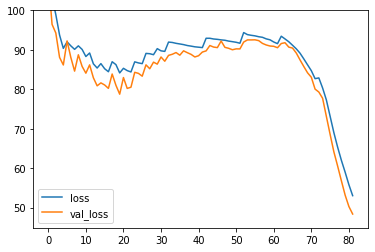

In [37]:
## Plot model loss over time
plt.plot(history, label='loss')
plt.plot(history_val, label='val_loss')
plt.ylim(top=100)
plt.legend()

In [22]:
# Plot model accuracy over time
#plt.plot(r.history['dense_12_accuracy'], label='acc')
#plt.plot(r.history['val_dense_12_accuracy'], label='val_acc')
#plt.legend()

In [23]:
print(np.round(n_qmega[5][0], decimals=2))

[[0.67]
 [1.  ]
 [0.78]
 [0.22]
 [0.56]
 [0.33]
 [0.  ]
 [0.44]
 [0.11]]


In [24]:
## check multi output solutions:

validation_set_quizzes = n_qmega[0:15000,:,:,:]

predictions = (p1,p2,p3,p4,p5,p6,p7,p8,p9,
 p10,p11,p12,p13,p14,p15,p16,p17,p18,
 p19,p20,p21,p22,p23,p24,p25,p26,p27,
 p28,p29,p30,p31,p32,p33,p34,p35,p36,
 p37,p38,p39,p40,p41,p42,p43,p44,p45,
 p46,p47,p48,p49,p50,p51,p52,p53,p54,
 p55,p56,p57,p58,p59,p60,p61,p62,p63,
 p64,p65,p66,p67,p68,p69,p70,p71,p72,
 p73,p74,p75,p76,p77,p78,p79,p80,p81) = model.predict(validation_set_quizzes)


# p1 shape = (15000, 1), etc.
# p1 = all sudokus, 1st cell, p2 = all sudokus 2nd cell, etc. 
# so, I need to compare p1 with solutions[0], because solutions[0], is all sudokus' first cell.


In [25]:
print(np.round(p1[0], decimals=2))

## now I need to get the index of the largest value here, starting at index 1, and that will be the prediction.

[0.   0.   0.   0.02 0.3  0.5  0.18 0.   0.   0.  ]


In [26]:
#print(predictions[0][0].argmax(axis=-1)+1)
predictions = np.asarray(predictions)
print(predictions.shape)
print(predictions[80][1023].argmax(axis=0))

(81, 15000, 10)
7


In [27]:
from tensorflow.keras.backend import argmax

#p3 = p3.argmax(axis = -1) + 1

digits = np.zeros((81,15000))

for p in range(81):
    for i in range(15000):
        digits[p][i] = predictions[p][i].argmax(axis=-1)


print(digits[0])


[5. 2. 6. ... 6. 8. 8.]


In [28]:
for i in range(20):
    print(np.round(predictions[i][i], decimals=2))

[0.   0.   0.   0.02 0.3  0.5  0.18 0.   0.   0.  ]
[0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.99]
[0.   0.   0.   0.1  0.14 0.54 0.19 0.03 0.   0.  ]
[0.   0.   0.   0.07 0.17 0.65 0.09 0.01 0.   0.  ]
[0.   0.   0.04 0.62 0.3  0.04 0.   0.   0.   0.  ]
[0.   0.   0.06 0.88 0.06 0.   0.   0.   0.   0.  ]
[0.   0.   0.   0.   0.   0.   0.   0.   0.95 0.04]
[0.   0.   0.   0.   0.   0.   0.02 0.59 0.39 0.  ]
[0.   0.07 0.23 0.26 0.34 0.11 0.   0.   0.   0.  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.   0.   0.   0.   0.   0.   0.22 0.78 0.   0.  ]
[0.   0.   0.   0.   0.   0.   0.   0.   0.71 0.29]
[0.   0.   0.01 0.2  0.72 0.07 0.   0.   0.   0.  ]
[0.   0.   0.   0.   0.   0.   0.   0.02 0.98 0.  ]
[0.   0.   0.   0.   0.   0.   0.34 0.66 0.   0.  ]
[0.   0.   0.   0.   0.   0.15 0.84 0.01 0.   0.  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.   0.87 0.13 0.   0.   0.   0.   0.   0.   0.  ]
[0.   0.   0.   0.   0.04 0.75 0.21 0.01 0.   0.  ]
[0.   0.   0.01 0.1  0.15 0.03 0.   0.   0.02 0.69]


In [29]:
print(digits.shape)

(81, 15000)


In [30]:
## reverse normalize: 

sol = solutions
sol = np.round((sol * 9), decimals=0)


In [31]:
#recreate the original sudoku shape from predictions:

all_predictions = []

d = digits 

for i in range(15000):
        sudoku_prediction = np.array((d[0][i],d[1][i],d[2][i],d[3][i],d[4][i],d[5][i],d[6][i],d[7][i],d[8][i],
                                     d[9][i],d[10][i],d[11][i],d[12][i],d[13][i],d[14][i],d[15][i],d[16][i],d[17][i],
                                     d[18][i],d[19][i],d[20][i],d[21][i],d[22][i],d[23][i],d[24][i],d[25][i],d[26][i],
                                     d[27][i],d[28][i],d[29][i],d[30][i],d[31][i],d[32][i],d[33][i],d[34][i],d[35][i],
                                     d[36][i],d[37][i],d[38][i],d[39][i],d[40][i],d[41][i],d[42][i],d[43][i],d[44][i],
                                     d[45][i],d[46][i],d[47][i],d[48][i],d[49][i],d[50][i],d[51][i],d[52][i],d[53][i],
                                     d[54][i],d[55][i],d[56][i],d[57][i],d[58][i],d[59][i],d[60][i],d[61][i],d[62][i],
                                     d[63][i],d[64][i],d[65][i],d[66][i],d[67][i],d[68][i],d[69][i],d[70][i],d[71][i],
                                     d[72][i],d[73][i],d[74][i],d[75][i],d[76][i],d[77][i],d[78][i],d[79][i],d[80][i]))
        all_predictions.append(sudoku_prediction)
    
all_predictions = np.asarray(all_predictions)

all_reshaped = np.reshape(all_predictions, (-1,9,9))
print(all_reshaped[9])


[[5. 2. 3. 5. 3. 7. 8. 9. 2.]
 [9. 4. 8. 4. 4. 5. 4. 7. 2.]
 [7. 2. 7. 9. 4. 8. 3. 1. 4.]
 [3. 9. 3. 8. 7. 6. 1. 4. 1.]
 [7. 8. 1. 2. 5. 4. 9. 7. 5.]
 [2. 6. 6. 3. 9. 1. 5. 8. 6.]
 [3. 3. 9. 5. 8. 2. 7. 4. 6.]
 [4. 5. 2. 7. 8. 9. 1. 3. 8.]
 [8. 7. 6. 4. 1. 3. 5. 2. 9.]]


In [42]:
print(all_reshaped[1])
np.random.seed(SEED)
np.random.shuffle(mega_sol)
print(mega_sol[1])

[[2. 9. 5. 6. 8. 4. 1. 7. 1.]
 [7. 6. 2. 3. 5. 2. 8. 9. 4.]
 [2. 8. 4. 9. 2. 7. 4. 5. 6.]
 [2. 4. 9. 1. 6. 5. 7. 3. 9.]
 [5. 1. 7. 5. 3. 8. 2. 7. 9.]
 [6. 6. 8. 7. 9. 2. 4. 1. 5.]
 [8. 2. 3. 5. 2. 9. 6. 4. 6.]
 [4. 5. 6. 8. 7. 2. 9. 2. 2.]
 [9. 8. 1. 4. 4. 6. 8. 8. 3.]]
[3 9 5 6 8 4 1 7 2 7 6 2 3 5 1 8 9 4 1 8 4 9 2 7 3 5 6 2 4 9 1 6 5 7 3 8 5
 1 7 4 3 8 2 6 9 6 3 8 7 9 2 4 1 5 8 2 3 5 1 9 6 4 7 4 5 6 8 7 3 9 2 1 9 7
 1 2 4 6 5 8 3]


Unique Values in Prediction:  [1. 2. 3. 4. 5. 6. 7. 8. 9.]
Occurence Count in Prediction:  [128944 127202 126858 136297 142015 131392 134751 147294 140247]



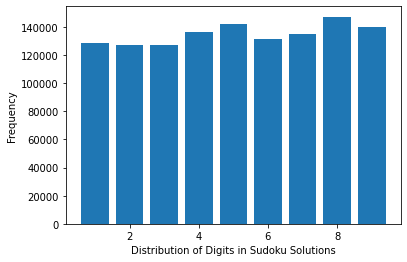

In [32]:
# Check Range of Values in Predictions:

preds = all_reshaped
uniqueValues, occurCount = np.unique(preds, return_counts=True)


print("Unique Values in Prediction: ", uniqueValues)
print("Occurence Count in Prediction: ", occurCount)
print()


## Plot Range of Values in Prediction
histogramP = plt.bar(uniqueValues, occurCount, )
plt.xlabel('Distribution of Digits in Sudoku Solutions')
plt.ylabel('Frequency')
plt.show()


In [33]:
"""
print("p11 has", p11_trues, "correct predictions ", p11_trues / 150, " percent accurate!")
print("p21 has", p21_trues, "correct predictions. ", p21_trues / 150, " percent accurate!" )
print("p31 has ", p31_trues, "correct predictions ", p31_trues / 150, " percent accurate!")
print("p41 has", p41_trues, "correct predictions. ", p41_trues / 150, " percent accurate!" )
print("p51 has", p51_trues, "correct predictions ", p51_trues / 150, " percent accurate!")
print("p61 has", p61_trues, "correct predictions. ", p61_trues / 150, " percent accurate!" )
print("p71 has", p71_trues, "correct predictions ", p71_trues / 150, " percent accurate!")
print("p81 has", p81_trues, "correct predictions. ", p81_trues / 150, " percent accurate!" )
"""


'\nprint("p11 has", p11_trues, "correct predictions ", p11_trues / 150, " percent accurate!")\nprint("p21 has", p21_trues, "correct predictions. ", p21_trues / 150, " percent accurate!" )\nprint("p31 has ", p31_trues, "correct predictions ", p31_trues / 150, " percent accurate!")\nprint("p41 has", p41_trues, "correct predictions. ", p41_trues / 150, " percent accurate!" )\nprint("p51 has", p51_trues, "correct predictions ", p51_trues / 150, " percent accurate!")\nprint("p61 has", p61_trues, "correct predictions. ", p61_trues / 150, " percent accurate!" )\nprint("p71 has", p71_trues, "correct predictions ", p71_trues / 150, " percent accurate!")\nprint("p81 has", p81_trues, "correct predictions. ", p81_trues / 150, " percent accurate!" )\n'

In [34]:
## SUDOKU SOLUTION CHECKING LOGIC:
#master functions to check a sudoku:

def isSolved(sudoku):
	return (check_rows(sudoku) and check_cols(sudoku) and check_blocks(sudoku))

def check_rows(arr):
	for l in arr:
		my_list = []
		for i in l:
			my_list.append(i)
		if checkIfDuplicates_1(my_list) or sum(my_list) != 45:
			return False
	return True

def check_cols(arr):
	trans = arr.transpose()
	return check_rows(trans)

def func(arr, h, h2, e, e2):
	my_list = [] 
	for i in range(h, h2):
		for j in range(e, e2):
			my_list.append(arr[i][j])
	if checkIfDuplicates_1(my_list) or sum(my_list) != 45:
		return False
	return True

def check_blocks(arr):
	if(func(arr, 0,3,0,3) and
		func(arr, 0,3,3,6) and
		func(arr, 0,3,6,9) and
		func(arr, 3,6,0,3) and
		func(arr, 3,6,3,6) and
		func(arr, 3,6,6,9) and
		func(arr, 6,9,0,3) and
		func(arr, 6,9,3,6) and
		func(arr, 6,9,6,9)):
		return True
	else:
		return False


def checkIfDuplicates_1(listOfElems):
    if len(listOfElems) == len(set(listOfElems)):
        return False
    else:
        return True


## TRUE ACCURACY CHECK
## Check random set of predictions and whether they are correctly solved sudokus: 

checkLength = 1000
booleanList = []
for i in range(0,checkLength):
	booleanList.append(isSolved(all_reshaped[random.randint(0,14000)]))

trues = booleanList.count(True)
total_accuracy = trues / checkLength * 100

print("#####################################################################")
print()
print("ACCURACY: ")
print("About ", total_accuracy, " percent of predicted solutions are correct")
print(trues, " of ", checkLength, " predicted sudokus were solved correctly")
print()
print("#####################################################################")


#####################################################################

ACCURACY: 
About  0.0  percent of predicted solutions are correct
0  of  1000  predicted sudokus were solved correctly

#####################################################################


In [35]:
## distribution of predicted values: 
#preds = np.round(n_prediction, decimals=0)
#uniqueValues, occurCount = np.unique(preds, return_counts=True)

#print("Unique Values in Prediction: ", uniqueValues)
#print("Occurence Count in Prediction: ", occurCount)
#print()

In [36]:
## Plot Range of Values in Prediction
#histogramP = plt.bar(uniqueValues, occurCount, )
#plt.xlabel('Distribution of Digits in Sudoku Solutions')#plt.ylabel('Frequency')